## Introduction
NSE stocks data available in the below link.

https://www.kaggle.com/laxmankusuma/nse-stocks-data-fetched-from-yahoo

you can download nse stock data.

For Python code to fetch nsestock data, available in my github,
find link below.

https://github.com/laxmankusuma/NSE-STOCK-HISTORICAL-DATA-FETCHING

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 20 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/NSE_351_TO_400_start_to_15082020.csv
/kaggle/input/NSE_1101_TO_1150_start_to_15082020.csv
/kaggle/input/NSE_451_TO_500_start_to_15082020.csv
/kaggle/input/NSE_951_TO_1000_start_to_15082020.csv
/kaggle/input/NSE_651_TO_700_start_to_15082020.csv
/kaggle/input/NSE_1051_TO_1100_start_to_15082020.csv
/kaggle/input/NSE_1001_TO_1050_start_to_15082020.csv
/kaggle/input/NSE_151_TO_200_start_to_15082020.csv
/kaggle/input/NSE_1_TO_50_start_to_15082020.csv
/kaggle/input/NSE_601_TO_650_start_to_15082020.csv
/kaggle/input/NSE_201_TO_250_start_to_15082020.csv
/kaggle/input/NSE_901_TO_950_start_to_15082020.csv
/kaggle/input/NSE_751_TO_800_start_to_15082020.csv
/kaggle/input/NSE_551_TO_600_start_to_15082020.csv
/kaggle/input/NSE_301_TO_350_start_to_15082020.csv
/kaggle/input/NSE_401_TO_450_start_to_15082020.csv
/kaggle/input/NSE_51_TO_100_start_to_15082020.csv
/kaggle/input/NSE_1151_TO_1200_start_to_15082020.csv
/kaggle/input/NSE_101_TO_150_start_to_15082020.csv
/kaggle/input/NSE_501_TO_5

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/NSE_1001_TO_1050_start_to_15082020.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# NSE_1001_TO_1050_start_to_15082020.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/NSE_1001_TO_1050_start_to_15082020.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'NSE_1001_TO_1050_start_to_15082020.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,SYMBOL
0,0,2002-07-01,10.65,9.65,10.65,10.35,463977.0,10.35,SPIC.NS
1,1,2002-07-02,11.60,10.45,10.45,11.40,371253.0,11.40,SPIC.NS
2,2,2002-07-03,12.40,11.40,11.40,11.90,440465.0,11.90,SPIC.NS
3,3,2002-07-04,12.10,11.60,12.00,11.65,87343.0,11.65,SPIC.NS
4,4,2002-07-05,12.25,11.40,11.40,11.55,162943.0,11.55,SPIC.NS


Distribution graphs (histogram/bar graph) of sampled columns:

In [8]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

Correlation matrix:

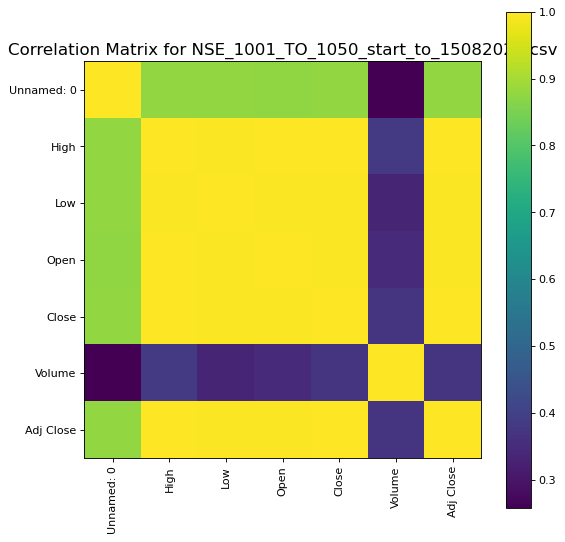

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

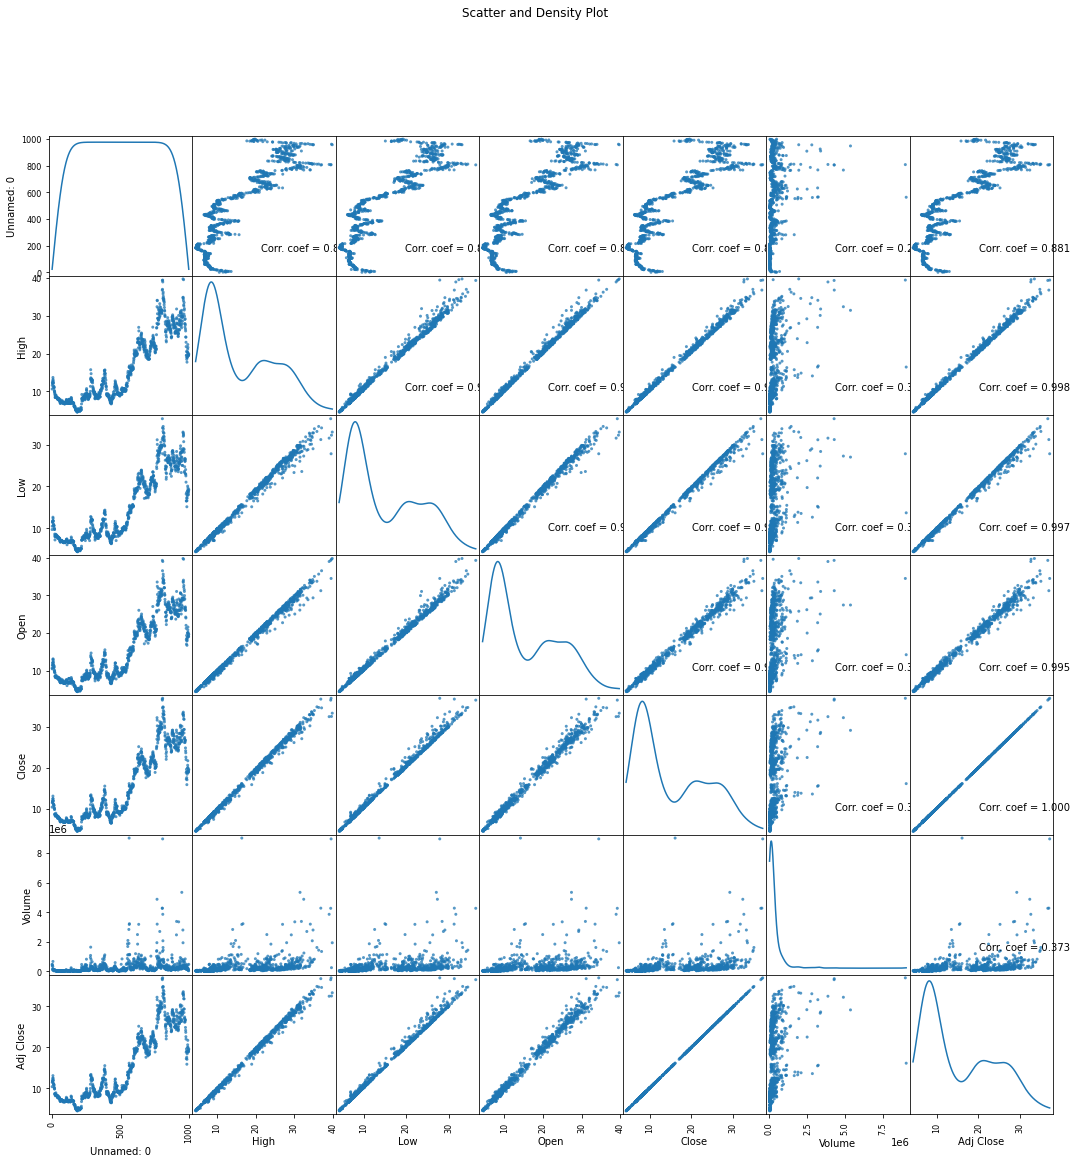

In [10]:
plotScatterMatrix(df1, 18, 10)

### Let's check 2nd file: /kaggle/input/NSE_101_TO_150_start_to_15082020.csv

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# NSE_101_TO_150_start_to_15082020.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/NSE_101_TO_150_start_to_15082020.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'NSE_101_TO_150_start_to_15082020.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


Let's take a quick look at what the data looks like:

In [12]:
df2.head(5)

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,SYMBOL
0,0,2002-07-04,20.85,20.049999,20.15,20.200001,12626.0,19.650681,OLECTRA.NS
1,1,2002-07-10,27.35,22.500000,23.00,23.900000,356025.0,23.250061,OLECTRA.NS
2,2,2002-07-11,24.90,23.000000,23.00,23.700001,170127.0,23.055502,OLECTRA.NS
3,3,2002-07-12,25.00,22.600000,24.00,23.150000,131447.0,22.520458,OLECTRA.NS
4,4,2002-07-15,26.85,22.150000,26.85,22.350000,75047.0,21.742214,OLECTRA.NS


Distribution graphs (histogram/bar graph) of sampled columns:

In [13]:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

Correlation matrix:

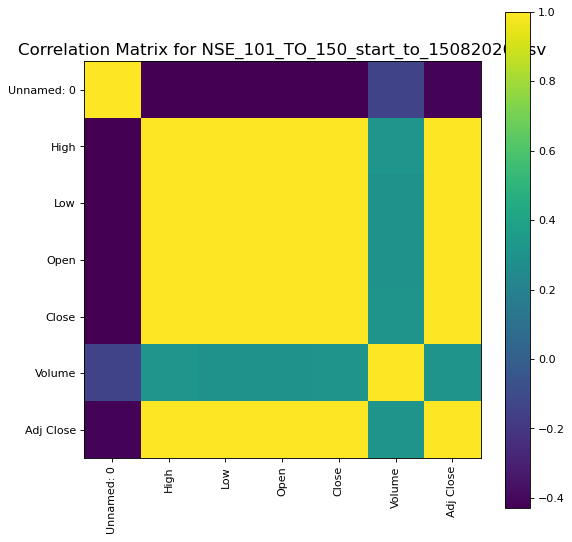

In [14]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

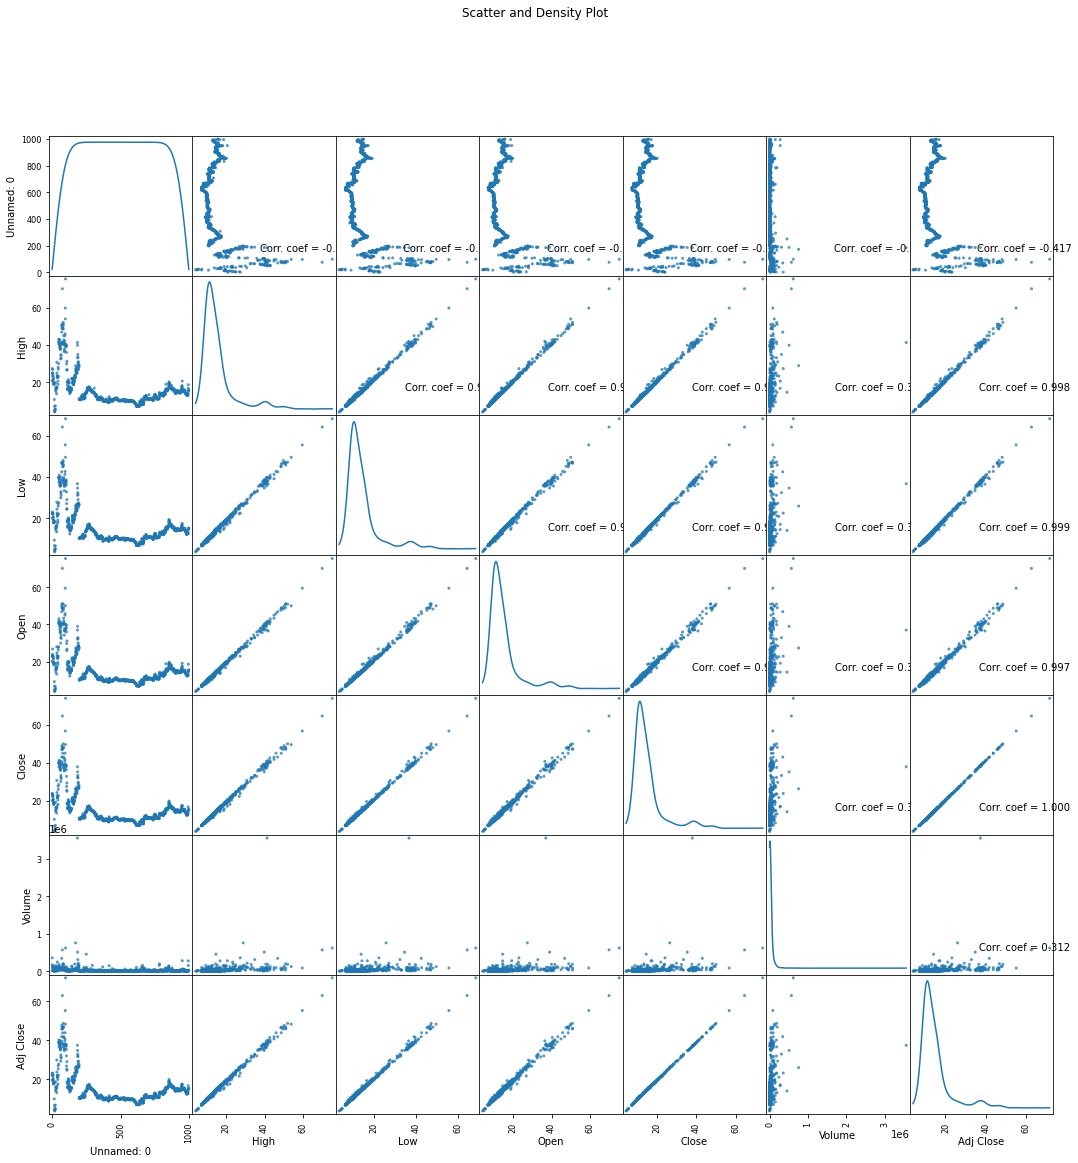

In [15]:
plotScatterMatrix(df2, 18, 10)

### Let's check 3rd file: /kaggle/input/NSE_1051_TO_1100_start_to_15082020.csv

In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# NSE_1051_TO_1100_start_to_15082020.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/NSE_1051_TO_1100_start_to_15082020.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'NSE_1051_TO_1100_start_to_15082020.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


Let's take a quick look at what the data looks like:

In [17]:
df3.head(5)

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,SYMBOL
0,0,2012-12-26,985.000000,895.000000,940.000000,922.549988,10188263.0,737.550903,CARERATING.NS
1,1,2012-12-27,948.000000,915.549988,924.799988,934.549988,1617271.0,747.144775,CARERATING.NS
2,2,2012-12-28,944.700012,923.349976,932.549988,927.000000,418253.0,741.108643,CARERATING.NS
3,3,2012-12-31,935.000000,912.549988,935.000000,914.799988,257787.0,731.355042,CARERATING.NS
4,4,2013-01-01,930.900024,910.000000,916.250000,918.950012,369659.0,734.672913,CARERATING.NS


Distribution graphs (histogram/bar graph) of sampled columns:

In [18]:
plotPerColumnDistribution(df3, 10, 5)

<Figure size 2400x512 with 0 Axes>

Correlation matrix:

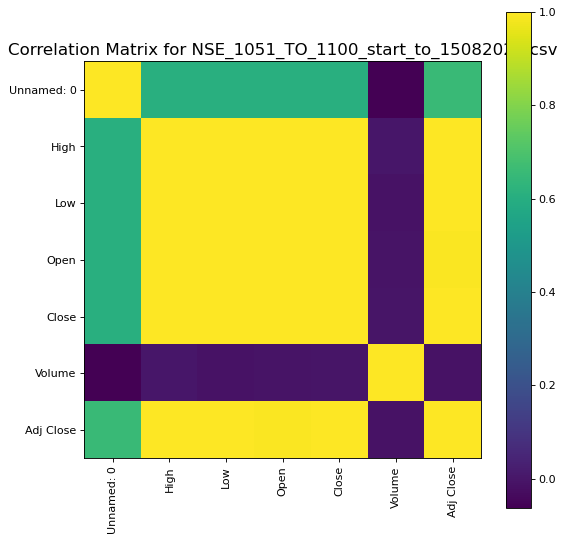

In [19]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

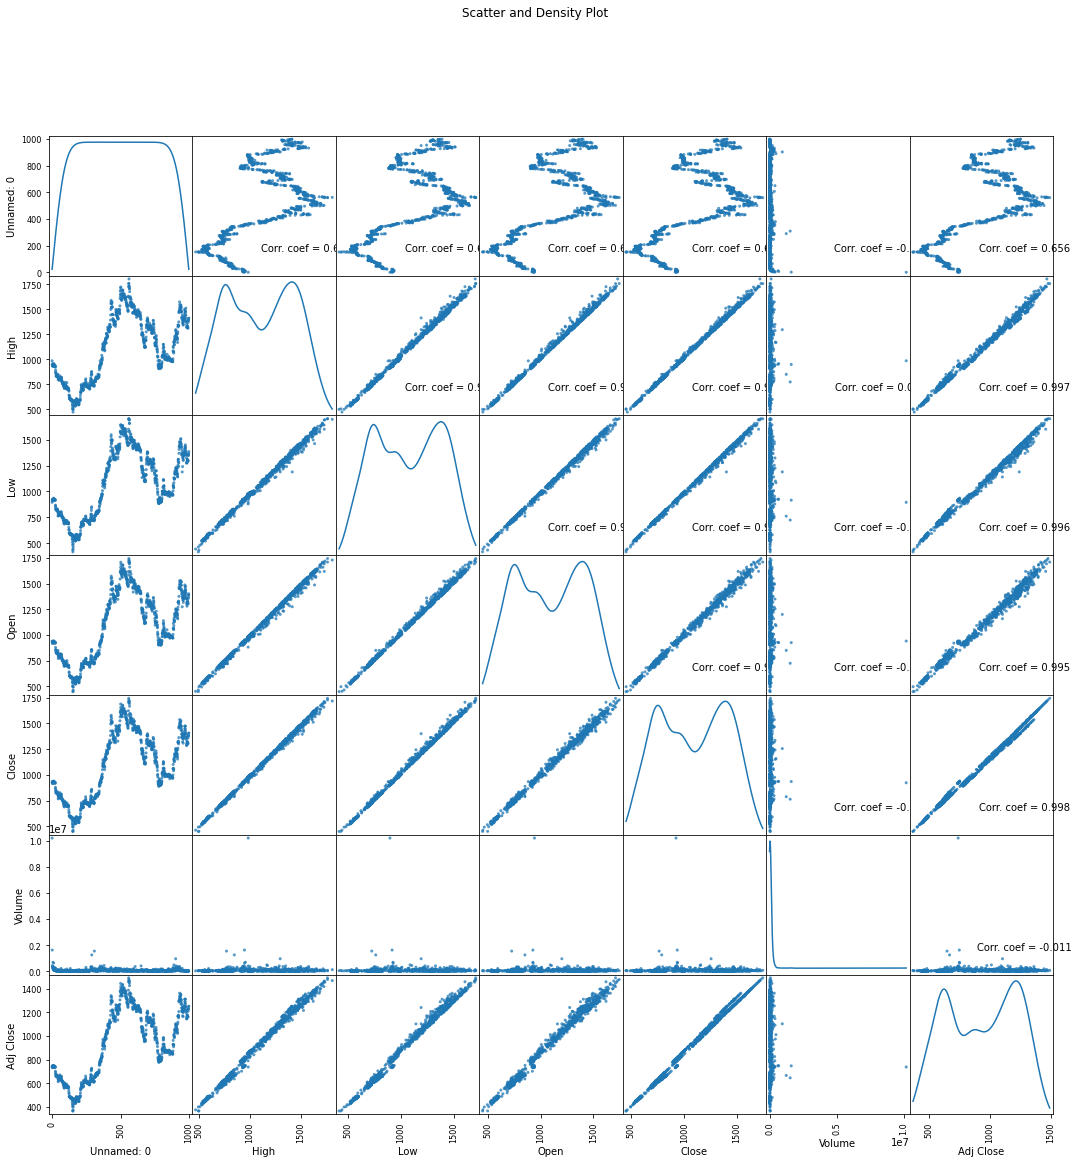

In [20]:
plotScatterMatrix(df3, 18, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!